# Initialisation

## Installing necessary components

In [2]:
!pip install transformers
!pip install datasets
!pip install osfclient
!pip install sentencepiece
!pip install simpletransformers
from simpletransformers.classification import MultiLabelClassificationModel
# !git clone https://github.com/yjthay/DZ_GenresAndStyle.git
import csv
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import itertools
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re

from datasets import load_dataset, list_datasets
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer,RobertaModel, RobertaTokenizer

nltk.download('stopwords')
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/utils.py
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/ekman_mapping.json -P ./data/
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/sentiment_mapping.json -P ./data/
# %cd /content/DZ_GenresAndStyle/

C:\Users\thayy\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\thayy\anaconda3\lib\site-packages\torchaudio\backend\utils.py:88: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


AttributeError: module 'torch' has no attribute '_utils_internal'

In [9]:
import csv
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import itertools
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re

from datasets import load_dataset, list_datasets
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer,RobertaModel, RobertaTokenizer

In [ ]:
!osf -p cku2b clone /content/

## Utility functions

In [3]:
from utils import *

No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (C:\Users\thayy\.cache\huggingface\datasets\go_emotions\simplified\0.0.0\2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)
No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (C:\Users\thayy\.cache\huggingface\datasets\go_emotions\simplified\0.0.0\2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)
No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (C:\Users\thayy\.cache\huggingface\datasets\go_emotions\simplified\0.0.0\2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


## Load full dataset

In [4]:
data = load_dataset('go_emotions')

No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (C:\Users\thayy\.cache\huggingface\datasets\go_emotions\simplified\0.0.0\2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


## Analysis of labels

Total number of train, test and validation samples is 54263
Number of samples with 1 label/labels = 45446
Number of samples with 2 label/labels = 8124
Number of samples with 3 label/labels = 655
Number of samples with 4 label/labels = 37
Number of samples with 5 label/labels = 1


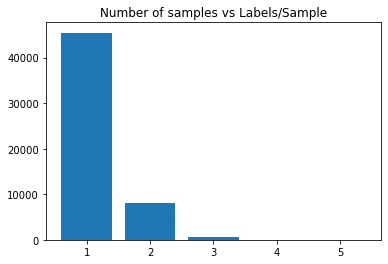

In [5]:
data_labels_all = data['train']['labels'] + data['test']['labels'] + data['validation']['labels']
print("Total number of train, test and validation samples is {}".format(len(data_labels_all)))
_labels, _counts = np.unique([len(y) for y in data_labels_all], return_counts=True)
plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
[print("Number of samples with {} label/labels = {}".format(i, j)) for i, j in zip(_labels, _counts)]
plt.title("Number of samples vs Labels/Sample")
plt.show()

In [6]:
label_mapping = {}
label_names = data['train'].features['labels'].__dict__['feature'].names
for i, emotion in enumerate(label_names):
    label_mapping[i] = emotion.strip()
label_mapping

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

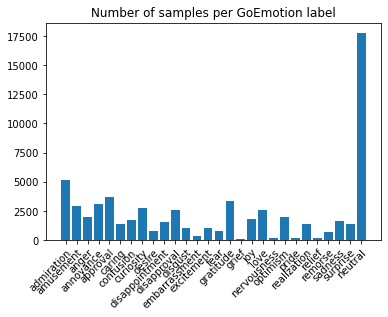

In [7]:
all_labels = list(itertools.chain.from_iterable(data_labels_all))
_labels, _counts = np.unique(all_labels, return_counts=True)
fig, ax = plt.subplots()
fig = plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
ax.set_xticklabels(label_names, horizontalalignment='right', wrap=True, rotation=45)
plt.title("Number of samples per GoEmotion label")
plt.show()

## Analysis of text

In [27]:
data_text_all = data['train']['text'] + data['test']['text'] + data['validation']['text']
BERT_TYPE_LIST = ['bert-base-cased', 'roberta-base']
bert_type = 'bert-base-cased'
[print(i) for i in data_text_all[:5]]
tokenizer = BertTokenizer.from_pretrained(bert_type)
tokens = tokenizer(data_text_all, padding='max_length', truncation=True, max_length=64, return_tensors="pt")
# tokens = tokenizer(data_text_all, padding=True, return_tensors="pt")

My favourite food is anything I didn't have to cook myself.
Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
WHY THE FUCK IS BAYLESS ISOING
To make her feel threatened
Dirty Southern Wankers


Text(0.5, 1.0, 'Distribution of sequence length of input text')

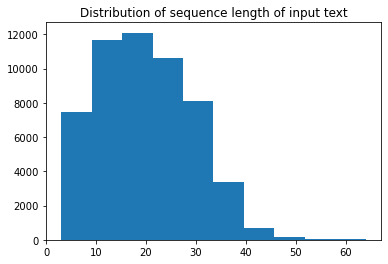

In [28]:
from scipy import stats

max_len = 0
total = 0
a = [sum(i != 0).item() for i in tokens['input_ids']]
plt.hist(a)
plt.title("Distribution of sequence length of input text")

In [29]:
max(a)

64

In [31]:
count=0
for input, att in zip(tokens['input_ids'], tokens['attention_mask']):
    if sum(att) > 64:
        count+=1
        print(sum(att),count)
        print(tokenizer.decode(input))

In [14]:
from nltk.corpus import stopwords

data_text_all = data['train']['text'] + data['test']['text'] + data['validation']['text']
data_labels_all = data['train']['labels'] + data['test']['labels'] + data['validation']['labels']
stop = stopwords.words('english')
stop.append('')
stop.append('[name]')

In [ ]:
porter = PorterStemmer()
sentences = [sentence.split(" ") for sentence in data_text_all]
sentence_word = []

# Remove stop words and create a list of list of the stemmed words
for sentence in sentences:
    sentence_word.append([porter.stem(w) for w in sentence if w.lower() not in stop])

# Allocated stemmed words to the specific labels we see them
words_of_label = {}

for idx, multilabel in enumerate(data_labels_all):
    for label in multilabel:
        if label not in words_of_label.keys():
            words_of_label[label] = sentence_word[idx]
        else:
            words_of_label[label] += sentence_word[idx]

corpus=[[] for _ in range(28)]
for idx, multilabel in enumerate(data_labels_all):
    for label in multilabel:
        corpus[label] += sentence_word[idx]

output= []
for i in range(len(corpus)):
    output.append(' '.join(corpus[i]))

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(output)
tf_idf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

f = plt.figure(figsize=(30,15))
f.suptitle("Most Frequent 30 Words",fontsize=20)
for i in range(28):
    wordCloud = WordCloud(max_words=30, width=800, height=800, background_color='lightgrey')
    wordCloud.generate_from_frequencies(nltk.FreqDist(words_of_label[i]))

    ax = f.add_subplot(4,7, i+1)
    ax.set_title(label_mapping[i].capitalize(),fontsize=16)
    ax.imshow(wordCloud, interpolation='bilinear', aspect="auto")
    ax.axis("off")
f.tight_layout()
f.subplots_adjust(top=0.94)

# Training

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

pre_path='/content/drive/MyDrive/DeepZen/'

## Training model for various BERTs

In [ ]:
DEVICE = 'cuda'  # cuda or cpu
save_path = pre_path+'model/epochs/'
max_length=64
train_dataset = EmotionsDataset(data['train'], device=DEVICE, max_length=max_length)
val_dataset = EmotionsDataset(data['validation'], device=DEVICE, max_length=max_length)

train_data = pd.DataFrame(list(zip(train_dataset.text, train_dataset.labels.tolist())),columns=["text","labels"])
val_data= pd.DataFrame(list(zip(val_dataset.text, val_dataset.labels.tolist())),columns=["text","labels"])
for name in ['roberta-base', 'distilbert-base-cased', 'bert-base-cased']:
    architecture = re.findall("^(.*?)-",name)[0]
    model = MultiLabelClassificationModel(architecture, name, args=gen_train_args(name), num_labels = 28)
    model.train_model(train_data, eval_df=val_data)

## T5 Training

In [ ]:
data = load_dataset('go_emotions')
val_data = T5Dataset(data['validation'], goemo_ratio=1.0)
DEVICE = 'cuda'  # cuda or cpu

for ratio in [1.0,0.75,0.5,0.333]:
    # save_path = '/content/drive/MyDrive/DeepZen/model/epochs/t5-base/'
    # model_file_path = best_model_filename(pre_path+str(ratio)+'/')
    # tuned_model = torch.load(model_file_path, map_location=torch.device(DEVICE))
    model = T5Model().to(DEVICE)
    train_losses, val_losses = train_T5(model, data, goemo_ratio=ratio, epochs=20, lr=2e-5, batch_size=16, show_progress=True, save_path=save_path+"/"+str(ratio)+"/")

## Duplicating files into osf storage from Google Drive

In [ ]:
!osf init
!osf list
!osf -p cku2b upload -r /content/drive/MyDrive/DeepZen/model/epochs /model/

# Analysis of results

Loading the best model based on the validation error

In [ ]:
model_names = ['distilbert-base-cased', 'bert-base-cased', 'roberta-base']#,'t5-base']
DEVICE = 'cuda' #'cpu'
pre_path = 'osfstorage/model/epochs/'
# pre_path = '/content/drive/MyDrive/DeepZen/model/epochs/'
tuned_models = {}
for name in model_names:
    architecture = re.findall("^(.*?)-",name)[0]
    tuned_models[name] = MultiLabelClassificationModel(architecture, pre_path+"/"+name+"/outputs/best_model")
print(tuned_models.keys())

## F1 Score of Models (Testing)

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, hamming_loss, accuracy_score

test_data = EmotionsDataset(data['test'], max_length=64, device=DEVICE)
t5_data_set = T5Dataset(data['test'], goemo_ratio=1.0)
threshold = 0.3
f1, precision, recall, jaccard = {}, {}, {}, {}
for name in model_names:
    # y_pred_test = predict(torch.load('/content/drive/MyDrive/DeepZen/model/epochs/roberta-base/epoch_2_0.15042.pt', map_location=torch.device(DEVICE)), test_data)
    _, y_pred_test = tuned_models[name].predict(test_data.text)
    architecture = re.findall("^(.*?)-",name)[0]
    y_true_test = test_data.labels.cpu().numpy()
    y_pred_test = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
    f1[architecture] = np.hstack((f1_score(y_true_test, y_pred_test, average=None),
                          f1_score(y_true_test, y_pred_test, average='macro'),
                          hamming_loss(y_true_test, y_pred_test)))
    precision[architecture] = np.hstack((precision_score(y_true_test, y_pred_test, average=None),
                                 precision_score(y_true_test, y_pred_test, average='macro')))
    recall[architecture] = np.hstack((recall_score(y_true_test, y_pred_test, average=None),
                              recall_score(y_true_test, y_pred_test, average='macro')))
    jaccard[architecture] = np.hstack((jaccard_score(y_true_test, y_pred_test, average=None),
                               jaccard_score(y_true_test, y_pred_test, average='macro')))
    hl = hamming_loss(y_true_test, y_pred_test)
    a = accuracy_score(y_true_test, y_pred_test)
    print("Name: {} yields an Hamming Loss of {} and Accuracy of {}".format(name, hl, a))

In [ ]:
# pre_path = '/content/drive/MyDrive/DeepZen/model/epochs'
for dir,folders,files in os.walk(pre_path):
    if dir==pre_path:
        for f in files:
            fname = dir+'/'+f
            name = 't5-'+re.findall('_(.+)_',f)[0]
            y_pred_test = predict_t5(torch.load(fname, map_location=torch.device(DEVICE)), t5_data_set)
            y_true_test =  test_data.labels.cpu().numpy()
            f1[name] = np.hstack((f1_score(y_true_test, y_pred_test, average=None),
                                  f1_score(y_true_test, y_pred_test, average='macro'),
                                  hamming_loss(y_true_test, y_pred_test)))
            precision[name] = np.hstack((precision_score(y_true_test, y_pred_test, average=None),
                                        precision_score(y_true_test, y_pred_test, average='macro')))
            recall[name] = np.hstack((recall_score(y_true_test, y_pred_test, average=None),
                                     recall_score(y_true_test, y_pred_test, average='macro')))
            jaccard[name] = np.hstack((jaccard_score(y_true_test, y_pred_test, average=None),
                                       jaccard_score(y_true_test, y_pred_test, average='macro')))
            hl = hamming_loss(y_true_test, y_pred_test)
            a = accuracy_score(y_true_test, y_pred_test)
            print("Name: {} yields an Hamming Loss of {} and Accuracy of {}".format(f, hl, a))

In [ ]:
# Create Index for f1, precision and recall tables
vals = list(config.GOEMO_MAPPING.values())
base_index = np.hstack((vals,
                      'macro'))
f1_index = np.hstack((base_index,'hamming loss'))
model_names=['distilbert', 'bert', 'roberta', 't5-1.0',  't5-0.75', 't5-0.5', 't5-0.333']
base_index,f1_index

In [ ]:
pd.set_option('precision', 4)
f1_emotions = pd.DataFrame(f1, index=f1_index, columns=model_names)
precision_emotions = pd.DataFrame(precision, index=base_index,columns=model_names)
recall_emotions = pd.DataFrame(recall, index=base_index, columns=model_names)
jaccard_emotions = pd.DataFrame(jaccard, index=base_index,columns=model_names)

In [ ]:
f1_emotions#.loc['macro']

In [ ]:
precision_emotions

In [ ]:
recall_emotions

In [ ]:
jaccard_emotions

## F1 Score of Testing Set

In [ ]:
test_data = EmotionsDataset(data['test'], max_length=64, device=DEVICE)
y_pred_test = predict(model, test_data)
y_true_test =  test_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
    f1 = f1_score(y_true_test, y_pred, average='samples')
    print("Testing - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Test

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test[:,:-1], label_mapping)

### tSNE Plot of Ekman - Test

In [ ]:
y_true_test_ekman = convert_to_ekman(reverse_one_hot(y_true_test))
y_true_test_ekman = label_multi_one_hot(y_true_test_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Test

In [ ]:
y_true_test_sentiment = convert_to_sentiment(reverse_one_hot(y_true_test))
y_true_test_sentiment = label_multi_one_hot(y_true_test_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Validation Set

In [ ]:
val_data = EmotionsDataset(data['validation'], max_length=64, device=DEVICE)
y_pred_val = predict(model, val_data)
y_true_val =  val_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_val>=threshold) * np.ones(y_pred_val.shape)
    f1 = f1_score(y_true_val, y_pred, average='samples')
    print("Validation - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Validation

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val[:,:-1], label_mapping)

### tSNE Plot of Ekman - Validation

In [ ]:
y_true_val_ekman = convert_to_ekman(reverse_one_hot(y_true_val))
y_true_val_ekman = label_multi_one_hot(y_true_val_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Validation

In [ ]:
y_true_val_sentiment = convert_to_sentiment(reverse_one_hot(y_true_val))
y_true_val_sentiment = label_multi_one_hot(y_true_val_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Training Set

In [ ]:
train_data = EmotionsDataset(data['train'], max_length=64, device=DEVICE)
y_pred_train = predict(model, train_data)
y_true_train =  train_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_train>=threshold) * np.ones(y_pred_train.shape)
    f1 = f1_score(y_true_train, y_pred, average='samples')
    print("Training - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Training

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train[:,:-1], label_mapping)

### tSNE Plot of Ekman - Training

In [ ]:
y_true_train_ekman = convert_to_ekman(reverse_one_hot(y_true_train))
y_true_train_ekman = label_multi_one_hot(y_true_train_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Training

In [ ]:
y_true_train_sentiment = convert_to_sentiment(reverse_one_hot(y_true_train))
y_true_train_sentiment = label_multi_one_hot(y_true_train_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_sentiment[:,:-1], sentiment_label_mapping, figsize=(20,20))



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

a = tokenizer.encode("translate English to French: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
# a = tokenizer.encode("translate English to German: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
print(a)
b = model.generate(a)
print(b)
tokenizer.decode(b[0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

threshold = 0.3
y_pred = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
results = {}
label_mapping = mapping()
for i in range(28):
    emotion = label_mapping[i]
    emotion_true = y_true_test[:, i]
    emotion_pred = y_pred[:, i]
    # results[emotion + "_accuracy"] = accuracy_score(emotion_true, emotion_pred)
    results[emotion + "_precision"], results[emotion + "_recall"], results[emotion + "_f1"], _ = precision_recall_fscore_support(emotion_true, emotion_pred, average="binary")

# test = 0
# count = 0
for i in results:
    print(i,results[i])